In [71]:
#import dependencies
import matplotlib.pyplot as plt
import hvplot.pandas
import pandas as pd
import requests
from datetime import datetime
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Load the track and field CSV file into a Pandas DataFrame
olympic_track_data = pd.read_csv("results.csv")

olympic_track_data.head()

In [ ]:
# Load the athlete events CSV file into a Pandas DataFrame
olympic_athletes_data = pd.read_csv("athlete_events.csv")

olympic_athletes_data.head()

In [ ]:
# Load the NOC CSV file into a Pandas DataFrame
NOC_data = pd.read_csv("noc_regions.csv")

NOC_data.head()

In [ ]:
distance_df = olympic_track_data.loc[(olympic_track_data['Event']=="10000M Men") | (olympic_track_data['Event']=="10000M Women")|
                                     (olympic_track_data['Event']=="1500M Women")|(olympic_track_data['Event']=="1500M Men") |
                                     (olympic_track_data['Event']=="3000M Women")|(olympic_track_data['Event']=="3000M Men") |
                                     (olympic_track_data['Event']=="4x400M Women")|(olympic_track_data['Event']=="4x400M Men") |
                                     (olympic_track_data['Event']=="5000M Women") | (olympic_track_data['Event']=="5000M Men")|
                                     (olympic_track_data['Event']=="800M Women") | (olympic_track_data['Event']=="800M Men") ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 
distance_df.head()

In [ ]:
# Split the time strings into minutes, seconds, and hundredths for distance races

distance_df = distance_df.dropna(how="any")

seconds_result = []
minutes = ""
seconds = ""

for result in distance_df['Result']:
    try:
        time = datetime.strptime(result,"%M:%S.%f")
    except ValueError:
        print("There was a time that didn't fit the format")
    except TypeError:
        print("There was a time that didn't fit the format")
        

# Convert the components to integers
    minutes = time.minute
    seconds = time.second
    hundredths = time.microsecond
    total_seconds = minutes * 60 + seconds
    total_time = float(total_seconds) + hundredths/1000000

    seconds_result.append(total_time)

distance_df['Time']=seconds_result

distance_df.tail()


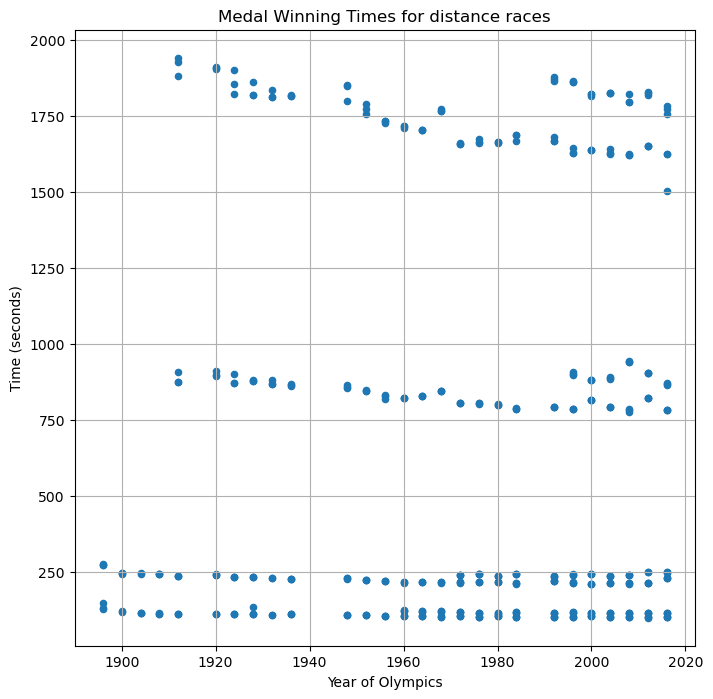

In [182]:
# all distance create scatter plot
distance_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for distance races",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/alldist.png")

# Show the plot
plt.show()
# boxplot
#ten_thousand_m_df.boxplot("Time", by="Year", figsize=(20, 10))


Make dataframes for individual events for plotting

In [ ]:
ten_thousand_m_df = distance_df.loc[(distance_df['Event']=='10000M Men')]
ten_thousand_w_df = distance_df.loc[(distance_df['Event']=='10000M Women')]
eight_hundred_m_df = distance_df.loc[(distance_df['Event']=='800M Men')]
eight_hundred_w_df = distance_df.loc[(distance_df['Event']=='800M Women')]
fifteen_hundred_w_df = distance_df.loc[(distance_df['Event']=='1500M Women')]
fifteen_hundred_m_df = distance_df.loc[(distance_df['Event']=='1500M Men')]
five_thousand_w_df = distance_df.loc[(distance_df['Event']=='5000M Women')]
five_thousand_m_df = distance_df.loc[(distance_df['Event']=='5000M Men')]


five_thousand_w_df.head()

In [ ]:
# ten thousand men create scatter plot
ten_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/10000men.png")

# Show the plot
plt.show()
# boxplot
#ten_thousand_m_df.boxplot("Time", by="Year", figsize=(20, 10))


In [ ]:
# ten thousand m women create scatter plot
ten_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 10,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")
#save the plot
plt.savefig("output_files/10000women.png")

# Show the plot
plt.show()


# boxplot
#ten_thousand_w_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# five thousand men create scatter plot
five_thousand_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/5000men.png")

# Show the plot
plt.show()
# boxplot
#five_thousand_m_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# five thousand women create scatter plot
five_thousand_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 5,000 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)",xticks=five_thousand_w_df['Year'])

#save the plot
plt.savefig("output_files/5000women.png")

# Show the plot
plt.show()
# boxplot
#five_thousand_w_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# fifteen hundred men create scatter plot
fifteen_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/1500men.png")

# Show the plot
plt.show()
# boxplot
#fifteen_hundred_m_df.boxplot("Time", by="Year", figsize=(20, 10))

In [ ]:
# fifteen hundred women create scatter plot
fifteen_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 1500 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/1500women.png")

# Show the plot
plt.show()
# boxplot
#fifteen_hundred_w_df.boxplot("Time", by="Year", figsize=(20, 10))

800 m Men

In [ ]:
# eight hundred men create scatter plot
eight_hundred_m_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Men",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/800men.png")

# Show the plot
plt.show()
# boxplot
#eight_hundred_m_df.boxplot("Time", by="Year", figsize=(20, 10))

800 m Women

In [ ]:
# eight hundred women create scatter plot
eight_hundred_w_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for 800 meter Women",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

#save the plot
plt.savefig("output_files/800women.png")

# Show the plot
plt.show()
# boxplot
#eight_hundred_w_df.boxplot("Time", by="Year", figsize=(20, 10))

JUMPS
Filter the Jumps data into a dataframe and clean the results - changing results into float values for height

In [105]:
jumps_df = olympic_track_data.loc[(olympic_track_data['Event']=="High Jump Men") | (olympic_track_data['Event']=="High Jump Women")|
                                     (olympic_track_data['Event']=="Pole Vault Women")|(olympic_track_data['Event']=="Pole Vault Men") |
                                     (olympic_track_data['Event']=="Long Jump Women")|(olympic_track_data['Event']=="Long Jump Men") |
                                     (olympic_track_data['Event']=="Triple Jump Women")|(olympic_track_data['Event']=="Triple Jump Men")
                                    ]

#long_distance_df = olympic_track_data[(olympic_track_data['Event']=="Marathon Men") |(olympic_track_data['Event']=="Marathon Women")]
 
height = []
for result in jumps_df['Result']:
    high = float(result)
    height.append(high)

jumps_df['height']=height
jumps_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,height
1200,M,High Jump Men,Rio,2016,G,Derek DROUIN,CAN,2.38,2.38
1201,M,High Jump Men,Rio,2016,S,Mutaz Essa BARSHIM,QAT,2.36,2.36
1202,M,High Jump Men,Rio,2016,B,Bohdan BONDARENKO,UKR,2.33,2.33
1203,M,High Jump Men,Beijing,2008,G,Andrey SILNOV,RUS,2.36,2.36
1204,M,High Jump Men,Beijing,2008,S,Germaine MASON,GBR,2.34,2.34


setting up Jump dataframes for plotting

In [111]:
high_jump_m_df = jumps_df.loc[(jumps_df['Event']=='High Jump Men')]
high_jump_w_df = jumps_df.loc[(jumps_df['Event']=='High Jump Women')]
long_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Men')]
long_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Long Jump Women')]
triple_jump_m_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Men')]
triple_jump_w_df = jumps_df.loc[(jumps_df['Event']=='Triple Jump Women')]
pole_vault_m_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Men')]
pole_vault_w_df = jumps_df.loc[(jumps_df['Event']=='Pole Vault Women')]

High Jump Men = plot

In [ ]:
# high jump men create scatter plot
high_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Men",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/high_jump_men.png")

# Show the plot
plt.show()
# boxplot
#high_jump_m_df.boxplot("height", by="Year", figsize=(20, 10))

In [ ]:
# high jump women create scatter plot
high_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning High Jumps Women",xlabel = "Year of Olympics", ylabel = "Height(m)")

#save the plot
plt.savefig("output_files/high_jump_women.png")

# Show the plot
plt.show()

In [ ]:
# long jump men create scatter plot
long_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/long_jump_men.png")

# Show the plot
plt.show()

In [ ]:
# long jump women create scatter plot
long_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Long Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/long_jump_women.png")

# Show the plot
plt.show()

In [ ]:
# triple jump men create scatter plot
triple_jump_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Men",xlabel = "Year of Olympics", ylabel = "Distance(m)")

#save the plot
plt.savefig("output_files/triple_jump_men.png")

# Show the plot
plt.show()

In [ ]:
# triple jump women create scatter plot
triple_jump_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Triple Jumps Women",xlabel = "Year of Olympics", ylabel = "Distance(m)",xticks=triple_jump_w_df['Year'])

#save the plot
plt.savefig("output_files/triple_jump_women.png")

# Show the plot
plt.show()

In [ ]:
# pole vault men create scatter plot
pole_vault_m_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Men",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/pole_vault_men.png")

# Show the plot
plt.show()

In [ ]:
# pole vault women create scatter plot
pole_vault_w_df.plot(kind="scatter", x="Year", y="height", grid=True, figsize=(8,8),
              title="Medal Winning Pole Vaults Women",xlabel = "Year of Olympics", ylabel = "Height (m)")

#save the plot
plt.savefig("output_files/pole_vault_women.png")

# Show the plot
plt.show()

Filter the sprints into a database and clean up the results - make into float

In [146]:
sprints_df = olympic_track_data.loc[(olympic_track_data['Event']=="100M Men") | (olympic_track_data['Event']=="100M Women")|
                                     (olympic_track_data['Event']=="200M Women")|(olympic_track_data['Event']=="200M Men") |
                                     (olympic_track_data['Event']=="400M Women")|(olympic_track_data['Event']=="400M Men") |
                                     (olympic_track_data['Event']=="100M Hurdles Women")|(olympic_track_data['Event']=="110M Hurdles Men") |
                                     (olympic_track_data['Event']=="400M Hurdles Women")|(olympic_track_data['Event']=="400M Hurdles Men")]

sprints_df = sprints_df.dropna(how="any")

#clean results in format with 00: for minutes in front of seconds
sprints_df['Result'] = sprints_df['Result'].str.replace('^00:', '',regex=True)

quicktime = []

for result in sprints_df['Result']:
    bolt = float(result)
    quicktime.append(bolt)

sprints_df['time']=quicktime


In [147]:

sprints_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,time
69,M,100M Men,Rio,2016,G,Usain BOLT,JAM,9.81,9.81
70,M,100M Men,Rio,2016,S,Justin GATLIN,USA,9.89,9.89
71,M,100M Men,Rio,2016,B,Andre DE GRASSE,CAN,9.91,9.91
72,M,100M Men,Beijing,2008,G,Usain BOLT,JAM,9.69,9.69
73,M,100M Men,Beijing,2008,S,Richard THOMPSON,TTO,9.89,9.89


set up sprint dataframes for plotting

In [148]:
one_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='100M Men')]
one_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='100M Women')]
two_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='200M Men')]
two_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='200M Women')]
four_hundred_m_df = sprints_df.loc[(sprints_df['Event']=='400M Men')]
four_hundred_w_df = sprints_df.loc[(sprints_df['Event']=='400M Women')]
one_hundred_hurdles_df = sprints_df.loc[(sprints_df['Event']=='100M Hurdles Women')]
one_ten_hurdles_df = sprints_df.loc[(sprints_df['Event']=='110M Hurdles Men')]
four_hundred_hurd_m_df = sprints_df.loc[(sprints_df['Event']=='400M Hurdles Men')]
four_hundred_hurd_w_df = sprints_df.loc[(sprints_df['Event']=='400M Hurdles Women')]

In [ ]:
# 100 meter men create scatter plot
one_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/100_m_men.png")

# Show the plot
plt.show()

In [ ]:
# 100 meter women create scatter plot
one_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/100_m_women.png")

# Show the plot
plt.show()

In [ ]:
# 200 meter men create scatter plot
two_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 200 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/200_m_men.png")

# Show the plot
plt.show()

In [ ]:
# 200 meter women create scatter plot
two_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 200 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/200_m_women.png")

# Show the plot
plt.show()

In [ ]:
# 400 meter men create scatter plot
four_hundred_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/400_m_men.png")

# Show the plot
plt.show()

In [ ]:
# 400 meter women create scatter plot
four_hundred_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/400_m_women.png")

# Show the plot
plt.show()

In [ ]:
# 110 meter hurdlesmen create scatter plot
one_ten_hurdles_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 110 M Hurdle Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/110_m_hurdles.png")

# Show the plot
plt.show()

In [ ]:
# 100 meter hurdle women create scatter plot
one_hundred_hurdles_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 100 M Hurdle Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/100_m_hurdles.png")

# Show the plot
plt.show()

In [ ]:
# 400 meter hurdle smen create scatter plot
four_hundred_hurd_m_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Hurdle Times Men",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/400_m_hurdles_men.png")

# Show the plot
plt.show()

In [ ]:
# 400 meter hurdle women create scatter plot
four_hundred_hurd_w_df.plot(kind="scatter", x="Year", y="time", grid=True, figsize=(8,8),
              title="Medal Winning 400 M Hurdle Times Women",xlabel = "Year of Olympics", ylabel = "Time (s)")

#save the plot
plt.savefig("output_files/400_m_hurdles_women.png")

# Show the plot
plt.show()

Filter Throwing Events into a dataframe

In [175]:
throws_df = olympic_track_data.loc[(olympic_track_data['Event']=="Discus Throw Men") | (olympic_track_data['Event']=="Discus Throw Women")|
                                     (olympic_track_data['Event']=="Hammer Throw Women")|(olympic_track_data['Event']=="Hammer Throw Men") |
                                     (olympic_track_data['Event']=="Javelin Throw Women")|(olympic_track_data['Event']=="Javelin Throw Men") |
                                     (olympic_track_data['Event']=="Shot Put Women")|(olympic_track_data['Event']=="Shot Put Men")]

throws_df.tail()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
2373,W,Shot Put Women,Munich,1972,S,Margitta HELMBOLD-GUMMEL,GDR,20.22
2374,W,Shot Put Women,Munich,1972,B,Ivanka KHRISTOVA,BUL,19.35
2375,W,Shot Put Women,Tokyo,1964,G,Tamara PRESS,URS,18.14
2376,W,Shot Put Women,Tokyo,1964,S,Renate GARISCH-CULMBERGER-BOY,EUA,17.61
2377,W,Shot Put Women,Tokyo,1964,B,Galina ZYBINA,URS,17.45


Convert Results to float and append to a new column

In [176]:
distance = []

for result in throws_df['Result']:
    hurl = float(result)
    distance.append(hurl)

throws_df['distance']=distance
throws_df.tail()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,distance
2373,W,Shot Put Women,Munich,1972,S,Margitta HELMBOLD-GUMMEL,GDR,20.22,20.22
2374,W,Shot Put Women,Munich,1972,B,Ivanka KHRISTOVA,BUL,19.35,19.35
2375,W,Shot Put Women,Tokyo,1964,G,Tamara PRESS,URS,18.14,18.14
2376,W,Shot Put Women,Tokyo,1964,S,Renate GARISCH-CULMBERGER-BOY,EUA,17.61,17.61
2377,W,Shot Put Women,Tokyo,1964,B,Galina ZYBINA,URS,17.45,17.45


create a data frame for each event for plotting

In [177]:
shot_put_m_df = throws_df.loc[(throws_df['Event']=='Shot Put Men')]
shot_put_w_df = throws_df.loc[(throws_df['Event']=='Shot Put Women')]
javelin_m_df = throws_df.loc[(throws_df['Event']=='Javelin Throw Men')]
javelin_w_df = throws_df.loc[(throws_df['Event']=='Javelin Throw Women')]
discus_m_df = throws_df.loc[(throws_df['Event']=='Discus Throw Men')]
discus_w_df = throws_df.loc[(throws_df['Event']=='Discus Throw Women')]
Hammer_Throw_m_df = throws_df.loc[(throws_df['Event']=='Hammer Throw Men')]
Hammer_Throw_w_df = throws_df.loc[(throws_df['Event']=='Hammer Throw Women')]

plot for women's shot put

In [ ]:
# shot put women create scatter plot
shot_put_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Shot Puts Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/shot put women.png")

# Show the plot
plt.show()

In [ ]:
# shot put men create scatter plot
shot_put_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Shot Puts Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/shot put Men.png")

# Show the plot
plt.show()

In [ ]:
# discus women create scatter plot
discus_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Discus Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/discus women.png")

# Show the plot
plt.show()

In [ ]:
# discus men create scatter plot
discus_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Discus Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/discus men.png")

# Show the plot
plt.show()

In [ ]:
# javelin women create scatter plot
javelin_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Javelin Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/javelin women.png")

# Show the plot
plt.show()

In [ ]:
# javelin men create scatter plot
javelin_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Javelin Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/javelin men.png")

# Show the plot
plt.show()

In [ ]:
# hammer women create scatter plot
Hammer_Throw_w_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Hammer Throw Women",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/hammer women.png")

# Show the plot
plt.show()

In [ ]:
# hammer men create scatter plot
Hammer_Throw_m_df.plot(kind="scatter", x="Year", y="distance", grid=True, figsize=(8,8),
              title="Medal Winning Hammer Throw Men",xlabel = "Year of Olympics", ylabel = "Distance (m)")

#save the plot
plt.savefig("output_files/hammer men.png")

# Show the plot
plt.show()

I think it may be interesting to look at ALL of the medal results for a particular event by gender and get statistical values and a box plot.

In [ ]:
#extract groups by year 10000 m Men
group0 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1912]["Time"]
group1 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1920]["Time"]
group2 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1924]["Time"]
group3 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1928]["Time"]
group4 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1932]["Time"]
group5= ten_thousand_m_df[ten_thousand_m_df["Year"] == 1936]["Time"]
group6= ten_thousand_m_df[ten_thousand_m_df["Year"] == 1948]["Time"]
group7 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1952]["Time"]
group8 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1956]["Time"]
group9 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1960]["Time"]
group10 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1984]["Time"]
group11 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1988]["Time"]
group12 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1992]["Time"]
group13 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1996]["Time"]
group14 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2000]["Time"]
group15= ten_thousand_m_df[ten_thousand_m_df["Year"] == 2004]["Time"]
group16 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2008]["Time"]
group17 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2012]["Time"]
group18 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2016]["Time"]

population = []
count = 0
while count <68:
    population.append((ten_thousand_m_df['Time'][count]))
    count+=1

# population

In [49]:
# ANOVA testing 10000 m Men

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6, group7, group8, group9, 
               group10, group11)

F_onewayResult(statistic=nan, pvalue=nan)

In [50]:
#extract groups by year 10000 m Women
group0 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1992]["Time"]
group1 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 1996]["Time"]
group2 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2000]["Time"]
group3 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2004]["Time"]
group4 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2008]["Time"]
group5= ten_thousand_m_df[ten_thousand_m_df["Year"] == 2012]["Time"]
group6 = ten_thousand_m_df[ten_thousand_m_df["Year"] == 2016]["Time"]

In [51]:
# ANOVA testing 10000 m Women

stats.f_oneway(group0, group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=2.8674495532651543, pvalue=0.04892405607657807)

# one t-test   not working

#get the mean
stats.ttest_1samp(group18, population.mean())

In [ ]:
# Build scatter plot for Time result vs. Year of Olympics
distance_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title="Medal Winning Times for Mens 10,000 meter",xlabel = "Year of Olympics", ylabel = "Time (seconds)")

Dist_events = ['10000 M Men', '10000M Women','1500M Women','1500M Men','3000M Women','3000M Men',"4x400M Women","4x400M Men",
               '5000M Women','5000M Men','800M Women','800M Men']

count = 0
for event in Dist_events:
    
    event_count_df = distance_df.loc[distance_df[event]]
    
    event_count_df.plot(kind="scatter", x="Year", y="Time", grid=True, figsize=(8,8),
              title=(f'Medal Winning Times for ', event ),xlabel = "Year of Olympics", ylabel = "Time (seconds)")
    count += 1




# Incorporate the other graph properties
# YOUR CODE HERE
